In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
df = pd.read_csv('../data/processed/preprocessed_080321.csv')
df

,floor_area_sqm,latitude,longitude,resale_price,price_per_area,lease_duration,storey,flat_type_ord,flat_model_adjoined flat,flat_model_apartment,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,118.0,1.369008,103.958697,209700.0,1777.118644,12,2.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,110.0,1.399007,103.906991,402300.0,3657.272727,11,11.0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
2,112.0,1.388348,103.873815,351000.0,3133.928571,16,2.0,5,0,0,...,0,0,0,0,0,0,0,0,0,1
3,67.0,1.318493,103.766702,151200.0,2256.716418,20,8.0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,73.0,1.348149,103.742658,318600.0,4364.383562,28,8.0,3,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,101.0,1.429658,103.792583,238500.0,2361.386139,5,2.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
431728,95.0,1.390053,103.875941,376200.0,3960.000000,4,14.0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
431729,67.0,1.349224,103.934913,255600.0,3814.925373,25,2.0,3,0,0,...,1,0,0,0,0,0,0,0,0,0
431730,123.0,1.389941,103.900721,508500.0,4134.146341,14,17.0,5,0,0,...,0,0,1,0,0,0,0,0,0,0


In [18]:
psch = pd.read_csv('../data/processed/psc-ranked-dist-matrix2.csv')
psch

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431728,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
431729,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
431730,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
rank = pd.read_csv("../data/processed/psch-ranked.csv")
rank

,name,lat,lng,PlacestakenuptillPhase2B
0,Admiralty Primary School,1.442941,103.800345,130.0
1,Ahmad Ibrahim Primary School,1.433849,103.832710,51.0
2,Ai Tong School,1.360713,103.833018,302.0
3,Alexandra Primary School,1.291284,103.824066,82.0
4,Anchor Green Primary School,1.390380,103.887354,101.0
...,...,...,...,...
186,Yuhua Primary School,1.342891,103.740960,62.0
187,Yumin Primary School,1.351264,103.950874,77.0
188,Zhangde Primary School,1.284250,103.826082,112.0
189,Zhenghua Primary School,1.379424,103.769676,99.0


In [20]:
x = np.array(rank["PlacestakenuptillPhase2B"])
feature = psch.dot(x)
feature

0         1046.000000
1         2548.222222
2         1462.000000
3          985.000000
4         1083.000000
             ...     
431727    1472.000000
431728    1462.000000
431729    1963.000000
431730    2563.222222
431731    1114.000000
Length: 431732, dtype: float64

In [21]:
df['psch-rank-value'] = feature
df

,floor_area_sqm,latitude,longitude,resale_price,price_per_area,lease_duration,storey,flat_type_ord,flat_model_adjoined flat,flat_model_apartment,...,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,psch-rank-value
0,118.0,1.369008,103.958697,209700.0,1777.118644,12,2.0,4,0,0,...,0,0,0,0,0,0,0,0,0,1046.000000
1,110.0,1.399007,103.906991,402300.0,3657.272727,11,11.0,5,0,0,...,0,0,1,0,0,0,0,0,0,2548.222222
2,112.0,1.388348,103.873815,351000.0,3133.928571,16,2.0,5,0,0,...,0,0,0,0,0,0,0,0,1,1462.000000
3,67.0,1.318493,103.766702,151200.0,2256.716418,20,8.0,3,0,0,...,0,0,0,0,0,0,0,0,0,985.000000
4,73.0,1.348149,103.742658,318600.0,4364.383562,28,8.0,3,0,0,...,0,1,0,0,0,0,0,0,0,1083.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,101.0,1.429658,103.792583,238500.0,2361.386139,5,2.0,4,0,0,...,0,0,0,0,0,0,0,0,0,1472.000000
431728,95.0,1.390053,103.875941,376200.0,3960.000000,4,14.0,4,0,0,...,0,0,0,0,1,0,0,0,0,1462.000000
431729,67.0,1.349224,103.934913,255600.0,3814.925373,25,2.0,3,0,0,...,0,0,0,0,0,0,0,0,0,1963.000000
431730,123.0,1.389941,103.900721,508500.0,4134.146341,14,17.0,5,0,0,...,0,1,0,0,0,0,0,0,0,2563.222222


In [22]:
seed = 42
df = df.sample(10000)
y = df['resale_price']
X = df.drop(columns=['resale_price', 'price_per_area', 'latitude', 'longitude'])
predictors = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [10]:
X_train, X_test_unused, y_train, y_test_unused = train_test_split(X_train, y_train, test_size=0.8, random_state=seed)

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# reg_knn = KNeighborsRegressor()
# reg_dt = DecisionTreeRegressor()
# reg_rf = RandomForestRegressor()
# reg_gb = GradientBoostingRegressor()
# reg_ab = AdaBoostRegressor()
# reg_lr = LogisticRegression()

In [33]:
rf = RandomForestRegressor(random_state=seed, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [34]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 29998.54609419214
Mean Squared Error: 2329847008.7906504
Root Mean Squared Error: 48268.488776743885


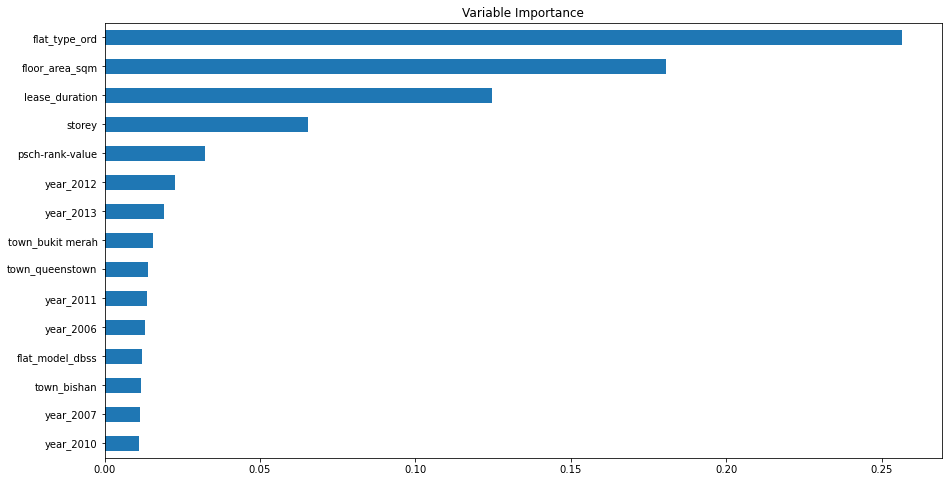

In [35]:
plt.rcParams["figure.figsize"] = (15, 8)
feat_imp = pd.Series(rf.feature_importances_, predictors).sort_values(ascending=True).tail(15)
feat_imp.plot(kind='barh')
plt.title('Variable Importance')
plt.show()

In [24]:
%%time

model = None

#########################################################################################
### Your code starts here ###############################################################

grid = {
    'max_depth' : [50, 100, 200, 500], # 20, 50
    'n_estimators' : [100, 200, 500, 1000] # 1000
}

est=RandomForestRegressor()
print(est.get_params())

model = GridSearchCV(estimator=est,
                   param_grid=grid, scoring='neg_root_mean_squared_error',
                    verbose=3, n_jobs=-1)
model.fit(X_train, y_train)

### Your code ends here #################################################################
######################################################################################### 

# Store the parameters of the best model
best_params = model.best_params_

# Predict class labels of test data on the model with the best found parameters
y_pred = model.predict(X_test)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 13.4min finished


CPU times: user 55.1 s, sys: 1.05 s, total: 56.1 s
Wall time: 14min 23s


In [25]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 30092.80884665487
Mean Squared Error: 2360162990.080134
Root Mean Squared Error: 48581.508725853026


In [27]:
y_pred

array([137907.09      , 535463.226     , 328472.2692    , ...,
       164707.8984    , 361793.24108571, 119878.3452    ])

In [37]:
%%time

model2 = None

#########################################################################################
### Your code starts here ###############################################################

grid2 = {
    'base_estimator__max_depth' : [50, 100, 200], 
    'n_estimators' : [500, 1000, 2000],
    'learning_rate' : [1]
}

est2=AdaBoostRegressor(base_estimator=DecisionTreeRegressor())
print(est2.get_params())

model2 = GridSearchCV(estimator=est2,
                   param_grid=grid2, scoring='neg_root_mean_squared_error',
                     verbose=3, n_jobs=-1)
model2.fit(X_train, y_train)

### Your code ends here #################################################################
######################################################################################### 

# Store the parameters of the best model
best_params2 = model2.best_params_

# Predict class labels of test data on the model with the best found parameters
y_pred2 = model2.predict(X_test)

{'base_estimator__ccp_alpha': 0.0, 'base_estimator__criterion': 'mse', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': 'deprecated', 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeRegressor(), 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': None}
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 33.0min finished


CPU times: user 2min 6s, sys: 1.94 s, total: 2min 8s
Wall time: 35min 15s


In [38]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2))
# print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 28155.766391999998
Mean Squared Error: 1980304075.2856402
Root Mean Squared Error: 44500.607583331264


In [39]:
print(best_params2)

{'base_estimator__max_depth': 200, 'learning_rate': 1, 'n_estimators': 2000}
